In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Загрузите файл HR.csv в pandas dataframe.


In [12]:
data = pd.read_csv("HR.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Рассчитайте основные статистики для переменных: среднее, медиана, мода, мин/макс, среднее отклонение.

In [3]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

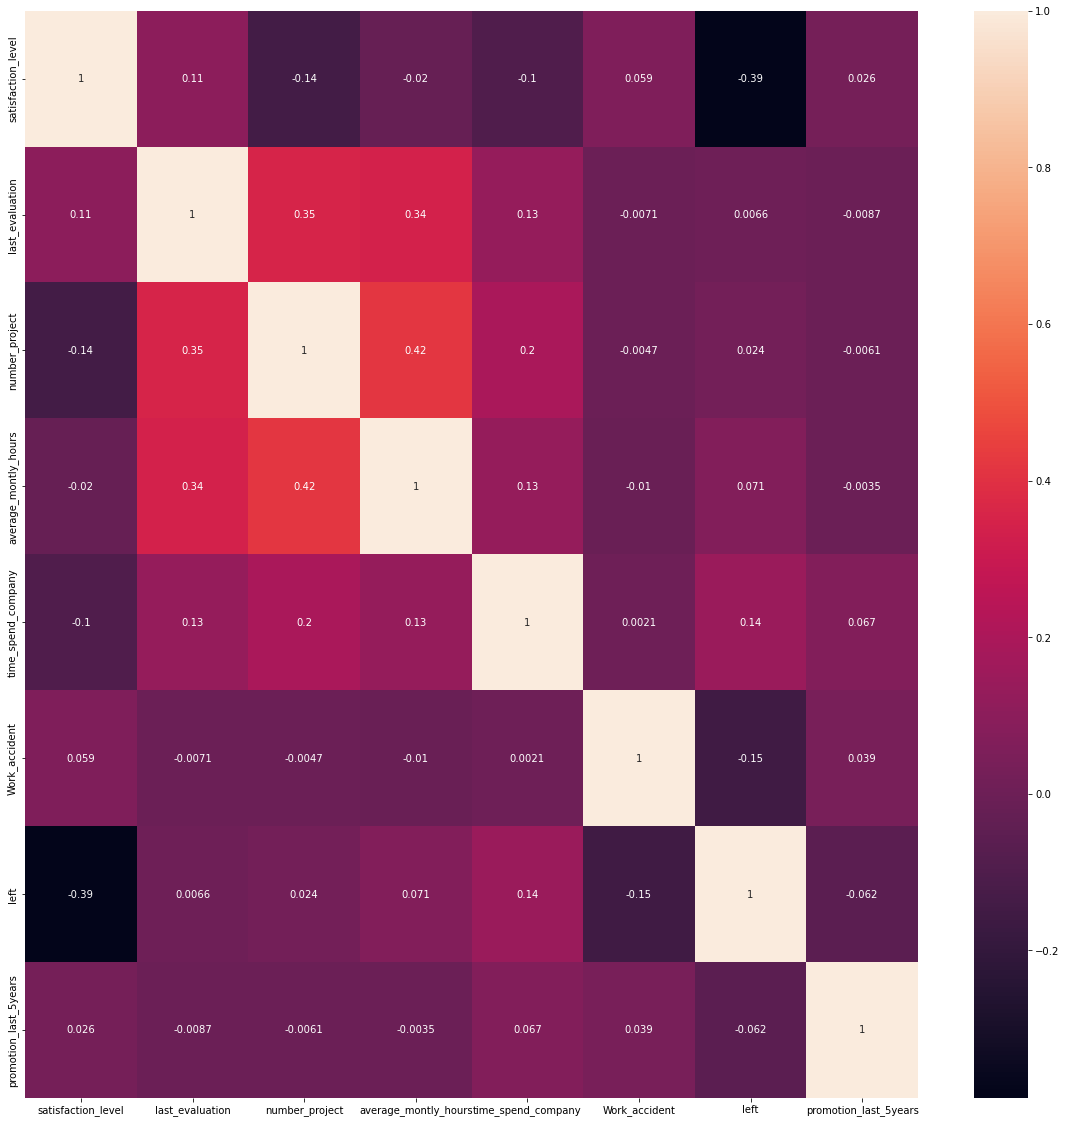

In [46]:
plt.rcParams["figure.figsize"] = (20, 20)

corr_matrix = data[data.columns[:-2]].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

Две наиболее скоррелированные average_monthly_hours и number_project
Две наименее скоррелированные time_spend_company и Work_accident

Рассчитайте, сколько сотрудников работает в каждом департаменте.


In [6]:
data.groupby("department").agg({"department": "count"})

,department
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


Покажите распределение сотрудников по зарплатам.

<AxesSubplot:>

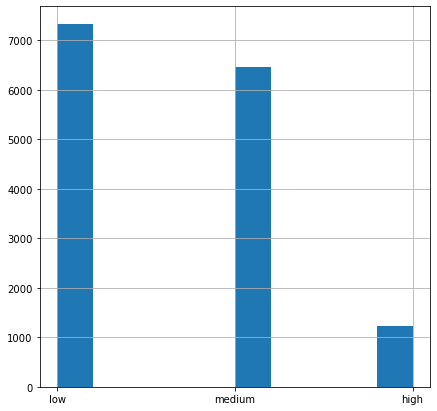

In [7]:
plt.rcParams["figure.figsize"] = (7, 7)
data["salary"].hist()

Покажите распределение сотрудников по зарплатам в каждом департаменте по отдельности.

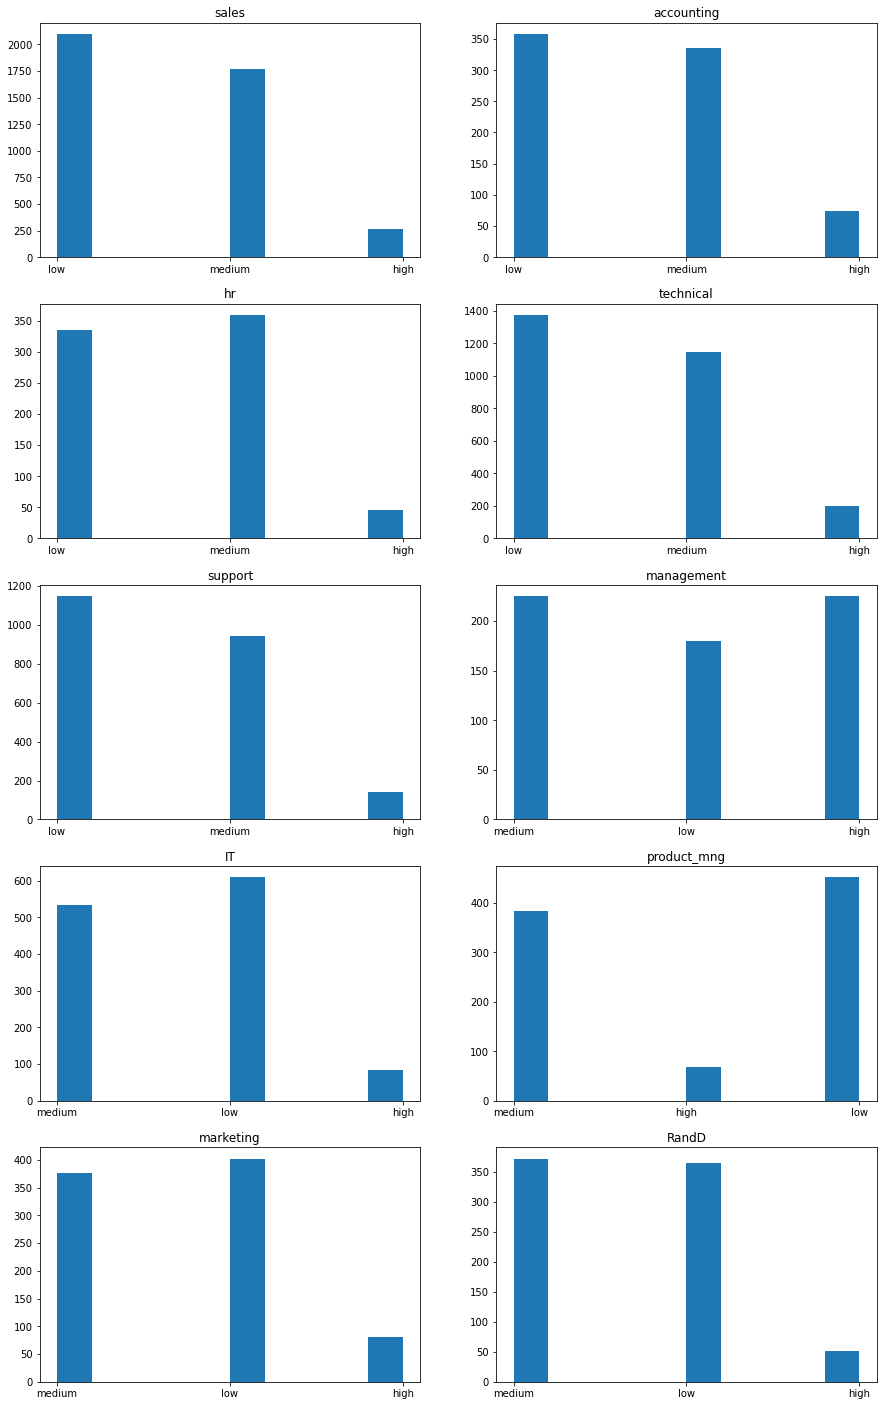

In [8]:

deps = data["department"].unique()

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

for ind, dep in enumerate(deps):

    ax[ind//2, ind%2].hist(data[data["department"] == dep ]["salary"])
    ax[ind//2, ind%2].set_title(dep)

Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [9]:
# сгруппируем сотрудников по зарплате и посчитаем среднее по average_montly_hours
data.groupby("salary").agg({"average_montly_hours": "mean"})

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


Видно, что сотрудники с высокой зарплатой меньше работают

Рассчитайте следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
-доля сотрудников с повышением за последние 5 лет;
-средняя степень удовлетворённости;
-среднее количество проектов.

In [10]:
data.groupby("left").agg({"promotion_last_5years": "mean", "satisfaction_level": "mean", "number_project": "mean"})

,promotion_last_5years,satisfaction_level,number_project
left,,,
0,0.026251,0.666810,3.786664
1,0.005321,0.440098,3.855503


Разделите данные на тестовую и обучающую выборки.


In [ ]:
y = data["left"]
X = data.drop(["left", "department", "salary"], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Постройте модель LDA, которая показывает, уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).

In [21]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

/Users/19823674/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


LinearDiscriminantAnalysis()

Оцените качество модели на тестовой выборке. Используйте метод accuracy.

In [22]:
accuracy_score(y_test, lda.predict(X_test))

/Users/19823674/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


0.7557777777777778